SVM Analysis
============

This notebook will analyze my attempt at making an SVM. Due to the large data size, the data is first clustered using the MiniBatchKmeans (see load.py and svm.py). This way, the SVM can be computed in a reasonable time.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import sklearn #SciKit-learn, good ML package
from sklearn.externals import joblib #for dumping and loading learned classifiers
from sklearn import tree as sktree
import os
import time
import matplotlib.pyplot as plt

from load import DataWorker #custom class for working with the data worker

cwd = os.getcwd()
ld = DataWorker() #load the data into the class
print("Size of training set: %d" % ld.n_training)
print("Number of input dimensions: %d" % ld.n_inputs)
print("Size of test set: %d" % ld.n_tests)


Size of training set: 200000
Number of input dimensions: 200
Size of test set: 200000


Cross Validation Scores
-----------------------------------

First, let's compute the CV score for 4 different kernels, tuning the C parameters. This parameters governs the degree to which the SVM algorithm allows for misclassification. C=1 means less mis-classification.

**Conclusions:** Well, this ended poorly. It appears the CV scores are awful, and return only zeroes. This is unfortunate as this means the SVM method is likely not going to be computationally feasible given my resources. Moving on for now.

In [7]:
work_dir = "%s/simple_svm" % cwd
kernels = ["linear", "poly", "rbf", "sigmoid"] #tried these four kernels

In [15]:
# load and compute averages and standard deviation for each kernel's CV score
all_cvalues = []
all_cv_avgs = []
all_cv_sd = []

for i_kern in kernels:
    all_cvalues.append(np.loadtxt("%s/cv_%s_values.dat" % (work_dir, i_kern)))
    cv_scores = np.loadtxt("%s/cv_%s_scores.dat" % (work_dir, i_kern))
    all_cv_avgs.append(cv_scores.mean(axis=1)) #I can't believe it took me 4 years to learn this trick
    all_cv_sd.append(cv_scores.std(axis=1))

    

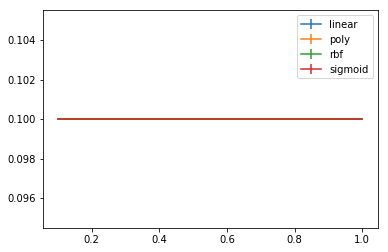

In [19]:
# plot the results
plt.figure()
for i in range(4):
    plt.errorbar(all_cvalues[i], all_cv_avgs[i], all_cv_sd[i], label=kernels[i])

plt.legend()